## Myntra Fashion Clothing 		 
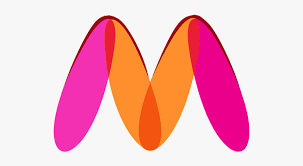


#### ***Task 1***

#### Import Libraries

In [1]:
import numpy as np ## Linear Algebra
import statistics as st
import pandas as pd ## To work with data 
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization
import os
import seaborn as sns

In [2]:
prod_details = pd.read_csv('product details.csv')
prod_details.head()

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


In [3]:
prod_details.shape

(12491, 3)

In [4]:
prod_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
dtypes: int64(1), object(2)
memory usage: 292.9+ KB


In [5]:
prod_catalog = pd.read_csv('products catalog.csv')
prod_catalog.head()

,Gender,Price (INR),NumImages,ProductID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


In [6]:
prod_catalog.shape

(12491, 6)

In [7]:
prod_catalog.describe()

,Price (INR),NumImages,ProductID
count,12491.000000,12491.000000,1.249100e+04
mean,1452.660956,4.913698,9.917160e+06
std,2118.503976,1.092333,1.438006e+06
min,90.000000,1.000000,1.012060e+05
25%,649.000000,5.000000,1.006215e+07
50%,920.000000,5.000000,1.015463e+07
75%,1499.000000,5.000000,1.021565e+07
max,63090.000000,10.000000,1.027514e+07


#### ***Task 2***

#### Merge prod_details and prod_catalog based on ProductID

In [8]:
data = pd.merge(prod_details,prod_catalog,on='ProductID')

In [9]:
data.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [10]:
data.shape

(12491, 8)

#### Check Duplicate Values

In [11]:
data['ProductID'].nunique()

12491

There are no duplicate values

#### Check for missing values

In [12]:
data.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

There are null values in PrimaryColor {894}.

## ***Scenario 2***

##### *1. There is a column that needs string strip operation. Identify that and apply it.*

In [13]:
data_object = data.select_dtypes(['object'])
data[data_object.columns] = data_object.apply(lambda x : x.str.strip())

In [14]:
data.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


##### *2. Fill the missing value by ‘Others’ in the column containing it.*

In [15]:
df = data
df['PrimaryColor'].fillna('Others',inplace = True)

In [16]:
color = df['PrimaryColor'].value_counts().reset_index()
color = color.sort_values(by ='PrimaryColor', ascending= False )[:15]
color

,index,PrimaryColor
0,Blue,3443
1,Black,1640
2,Red,1543
3,Green,908
4,Others,894
5,White,880
6,Grey,684
7,Brown,473
8,Yellow,406
9,Pink,391


##### *3. Since all the column names are single word so you can convert the ‘Price (INR)’ also to single name ‘Price’.*

In [17]:
df.rename(columns= {'Price (INR)':'Price'},inplace= True)
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price,NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


##### *4. Analyse the Gender column and include your viewpoints how to make it useful.*

In [18]:
df_gender = df['Gender'].value_counts().reset_index()
df_gender

,index,Gender
0,Women,5126
1,Men,4591
2,Unisex,1188
3,Boys,1100
4,Girls,440
5,Unisex Kids,46


In [19]:
px.pie(df_gender,values='Gender',names= 'index',hole= .3,color='index')

- We have higest number of {Women} products and the second highest is {Men} products.

In [20]:
data_g = df.groupby('Gender').agg(total_price_of_product = ('Price',np.sum),mean_price_of_product = ('Price',np.mean)).reset_index()
data_g.sort_values(by= 'total_price_of_product',ascending= False,inplace = True)
data_g

,Gender,total_price_of_product,mean_price_of_product
2,Men,7226137,1573.978872
5,Women,6952708,1356.361295
3,Unisex,2567416,2161.124579
0,Boys,934880,849.890909
1,Girls,414242,941.459091
4,Unisex Kids,49805,1082.717391


- The {Men} and {Women} have the Highest and 2nd Highest Price of total product present but both of there mean price of all the product is less than mean price for {Unisex} Product.
- Even though {Women} have maximum number of product present in myntra its in 2nd position for total price. 

## ***Scenario 3***

### ***Task 1***

##### **1. Univariate analysis of each variable.**

In [21]:
# PrimaryColor of Product
color
fig = px.bar(color[::-1],y = 'index',x='PrimaryColor',orientation='h',title='Number of products for each Primary Color',labels={'index':'Color','PrimaryColor':'No.Of Products'},text='PrimaryColor',color='PrimaryColor',color_continuous_scale = "darkmint")
fig.show()


In [22]:
# Number od Products of each product brand
brand = data['ProductBrand'].value_counts().reset_index()
brand.rename(columns={'index':'Brand','ProductBrand':"no_of_products"},inplace = True)
fig = px.bar(brand[:15],x = "no_of_products",y = 'Brand',orientation='h',text='no_of_products',color = 'Brand')
fig.update_layout(title_text='Number od Products of each Brand')

In [23]:
prod_name = data.ProductName.value_counts().reset_index()
prod_name.rename(columns={'index':'ProductName','ProductName':'Num of Same product'},inplace = True)
pod = prod_name[prod_name['Num of Same product']>10]
plt.figure(figsize=(20,15))
fig = px.bar(pod[::-1],x = 'Num of Same product',y = 'ProductName',orientation='h',color = 'Num of Same product')
fig.update_layout(title_text='Number od Products of each Brand')

<Figure size 2000x1500 with 0 Axes>

In [24]:
brand_img = data.groupby(by='ProductBrand').agg( Num_of_prod = ('ProductBrand',"count"),No_of_Image =('NumImages',np.sum)).reset_index()
brand_img.sort_values(by = 'Num_of_prod',ascending= False,inplace = True)
brand_img[::-1]

,ProductBrand,Num_of_prod,No_of_Image
676,yelloe,1,4
424,PURYS,1,5
422,PRITA,1,4
420,PERFKT-U,1,5
414,Orange and Orchid,1,7
...,...,...,...
201,Flying Machine,301,1472
17,AURELIA,307,1609
432,Pepe Jeans,340,1500
446,Puma,345,2103


In [25]:
col = ['Num_of_prod','No_of_Image']

px.bar(brand_img[:15][::-1],x = col,y = 'ProductBrand',orientation='h',barmode='group',)

##### **2. Bivariate Analysis of categorical vs numerical variables (Take target variable as fixed variable here)**

In [26]:
gen =  data.groupby(by ='Gender')['Price'].sum().reset_index()
px.bar(gen.sort_values(by = 'Price'), x = 'Gender' ,y = 'Price',color='Price',color_continuous_scale = "RdYlGn")

In [27]:
gen =  data.groupby(by ='PrimaryColor')['Price'].sum().reset_index()
px.bar(gen.sort_values(by = 'Price',ascending=False)[:20][::-1], y = 'PrimaryColor' ,x = 'Price',orientation='h' ,color='Price',text = 'PrimaryColor',color_continuous_scale = 'RdYlGn')

In [28]:
brand = data.groupby(by = ['ProductBrand'])['Price'].sum().reset_index()
brand.sort_values(by = 'Price',ascending=False,inplace = True)
fig = px.bar(brand[:15][::-1],y = "ProductBrand",x = 'Price',orientation='h',text='Price',color = 'Price',color_continuous_scale = 'RdYlBu')
fig.show()


In [29]:
brand = data.groupby(by = ['ProductName'])['Price'].sum().reset_index()
brand.sort_values(by = 'Price',ascending=False,inplace = True)
fig = px.bar(brand[:15][::-1],y = "ProductName",x = 'Price',orientation='h',text='Price',color = 'Price',color_continuous_scale = 'RdBu',title= 'Top 15 cost product')
fig.show()

##### ***3. Multivariate Analysis of categorical and numerical variables***

In [30]:
gen =  data.groupby(by =['Gender','PrimaryColor'])['Price'].sum().to_frame().reset_index()

gen['Price_percnt'] = round(gen['Price']/gen['Price'].sum()*100,2)
gen.sort_values(by = 'Price_percnt',ascending = True,inplace = True)

In [31]:
plt.figure(figsize=(100,20))
fig = px.bar(gen, y="PrimaryColor", x="Price_percnt",text = 'Price_percnt',
             color='Gender',
            facet_col="Gender", width = 1100, height = 800,orientation='h',title='Product Colou wise Price for Each Gender')
fig.show()

<Figure size 10000x2000 with 0 Axes>

In [32]:
bran =  data.groupby(by =['ProductBrand','Gender','PrimaryColor'])['Price'].sum().to_frame().reset_index()
bran.sort_values(by = 'Price',ascending = True,inplace = True)
bran = bran[bran['Price'] >10000]
bran

,ProductBrand,Gender,PrimaryColor,Price
3131,YWC,Men,Grey,10042
766,Ed Hardy,Men,Black,10044
2061,Oxolloxo,Women,Blue,10054
1984,Newport,Men,Blue,10069
2770,Tokyo Talkies,Women,Red,10089
...,...,...,...,...
2245,Puma,Unisex,Black,163276
2235,Puma,Men,Black,164425
628,DKNY,Unisex,Black,197255
449,Calvin Klein Jeans,Men,Blue,210570


In [33]:
plt.figure(figsize=(100,20))
fig = px.bar(bran, x="ProductBrand", y="Price",
             color='Gender',
             
            facet_row ="Gender", width = 1350, height = 1000,title='Product Brand Price for Each Gender')
fig.show()

<Figure size 10000x2000 with 0 Axes>

##### ***4. Check distribution of variables***

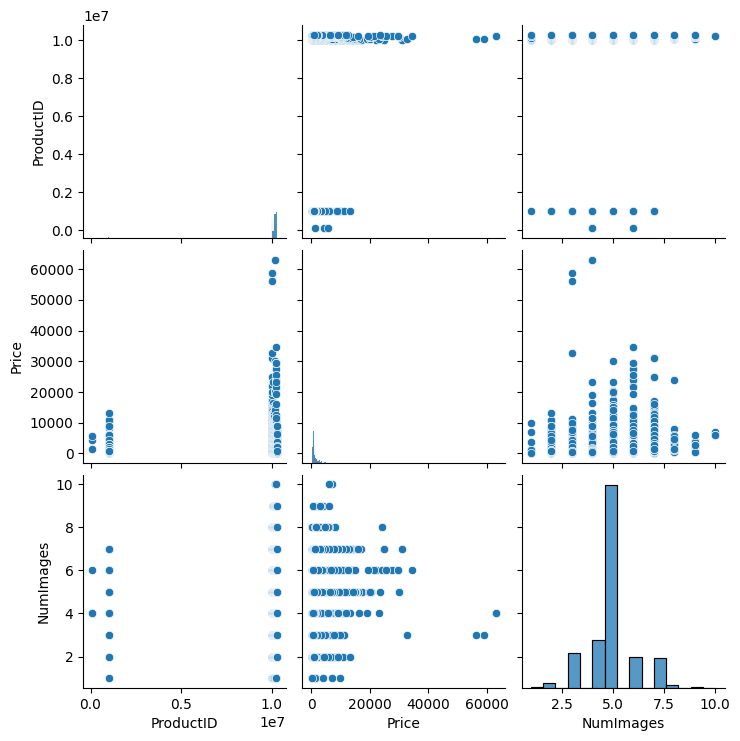

In [34]:
sns.pairplot(data)

#### **Task 2**

##### ***1.	Create a new Column “NewGender” to analyse further its distribution. Going forward we will consider this group for tasks***
Logic Applied
- Include Boys & Men as Men
- Include Girls & Women as Women
- Include Unisex & Unisex Kids as Unisex


In [35]:
def gender_new(gens):
    if gens == 'Boys':
        return 'Men'
    elif gens == 'Girls':
        return 'Women'
    elif gens == 'Unisex Kids':
        return 'Unisex'
    else:
        return gens
        
    

In [36]:
data['NewGender'] = data['Gender'].apply(gender_new)

In [37]:
data['NewGender'].unique()

array(['Unisex', 'Women', 'Men'], dtype=object)

##### ***2. Complete the analysis of NewGender along with other categorical cols.***

In [38]:
gencount = df['NewGender'].value_counts().reset_index()
px.pie(gencount,values='NewGender',names= 'index',hole= .5,color='index',color_discrete_map= {'Women':'darkblue',
                    'Men' : 'royalblue',
                    'Unisex':'cyan'},
       title= 'Percentage of Product Types Based on Genders')

In [39]:
gen =  data.groupby(by ='NewGender')['Price'].sum().reset_index()
gen['Price_Percent'] = round(100*gen['Price']/gen['Price'].sum(),2)
px.bar(gen.sort_values(by = 'Price_Percent'), 
       x = 'NewGender' ,
       y = 'Price_Percent',
       color='NewGender',
       text_auto=True,width=600,
       title='Total Percentage of Whole Myntra Sales Gender wize')

In [40]:
gen =  data.groupby(by =['NewGender','PrimaryColor'])['Price'].sum().to_frame().reset_index()

gen['Price_percnt'] = round(gen['Price']/gen['Price'].sum()*100,2)
gen.sort_values(by = 'Price_percnt',ascending = False,inplace = True)
fig = px.bar(gen[::-1], y="PrimaryColor", x="Price_percnt",text = 'Price_percnt',
             color='NewGender',
            facet_col="NewGender", width = 1100, height = 800,orientation='h',title='Product Colou v/s Price for Each Gender')
fig.show()

In [41]:
bran =  data.groupby(by =['ProductBrand','NewGender'])['Price'].sum().to_frame().reset_index()
bran.sort_values(by = 'Price',ascending = True,inplace = True)
bran = bran[bran['Price'] >10000]
bran

,ProductBrand,NewGender,Price
738,Wild stone,Men,10011
610,Saral Home,Unisex,10090
353,Just Wow,Women,10093
787,justpeachy,Women,10126
9,ADIDAS Originals,Women,10198
...,...,...,...
172,DKNY,Unisex,411965
680,Titan,Men,427623
536,Puma,Men,437178
128,Calvin Klein Jeans,Men,486119


In [42]:
fig = px.bar(bran, x="ProductBrand", y="Price",
             color='NewGender',
             
            facet_row ="NewGender", width = 1350, height = 1000,title='Product Brand vs Price for Each Gender')
fig.show()

#### **Task 3**

##### ***1.	Create a new Column “DescriptionLength” to analyse further its distribution.***
Logic Applied
- Each record of DescriptionLength is equal to the number of chars in Description


In [43]:
data["DescriptionLength"] = data['Description'].apply(lambda x: len(x))

In [44]:
print(data["DescriptionLength"].head(),'\n',data['DescriptionLength'].tail())

0    401
1    620
2    133
3    340
4    122
Name: DescriptionLength, dtype: int64 
 12486    280
12487    210
12488     84
12489     50
12490    186
Name: DescriptionLength, dtype: int64


2.	Complete the analysis of DescriptionLength along with other categorical cols. 

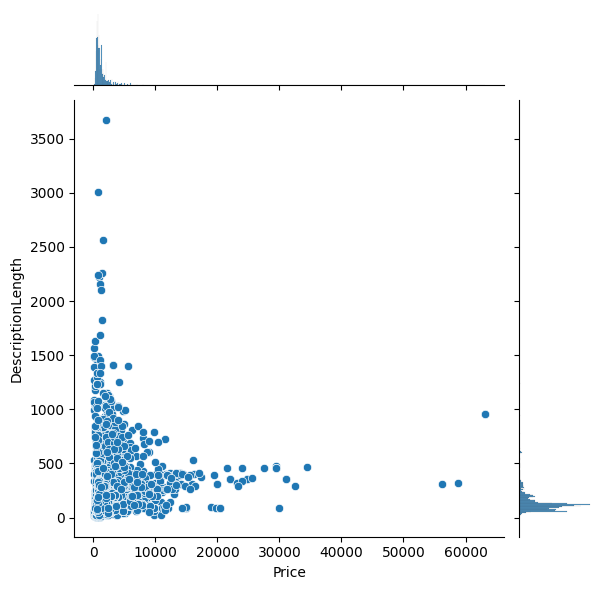

In [45]:
sns.jointplot(x=data['Price'],y=data['DescriptionLength'])

- We can see that most of the product with high description length doesnot means that their price is high.

In [46]:
brand_dl = data.groupby(by = ['ProductBrand'])['DescriptionLength'].mean().reset_index()
brand_dl.sort_values(by='DescriptionLength',inplace= True)

px.bar(brand_dl[brand_dl['DescriptionLength']>500],x='ProductBrand',y = 'DescriptionLength',color='DescriptionLength',color_continuous_scale ='emrld',height= 600)

- The higest mean descriptive length of the Product Brand is Plum

In [47]:
brand_dl = data.groupby(by = ['ProductBrand']).agg(DescriptionLength = ('DescriptionLength',np.sum),Total_Price = ('Price',np.sum)).reset_index()
brand_dl.sort_values(by = 'Total_Price',inplace=True)

In [48]:
px.bar(brand_dl[::-1][:50],x = 'ProductBrand', y= ['DescriptionLength','Total_Price'],barmode='group',height= 800,color_discrete_sequence=['Red','Blue']
)

- The higest Price of the band doesnot have the number of word.

In [49]:
gen_dl = data.groupby(by = ['NewGender']).agg(DescriptionLength = ('DescriptionLength',np.mean)).reset_index()

px.pie(gen_dl,values='DescriptionLength',names='NewGender',hole= 0.5,width= 500)

- Out of 100% of DescriptionLength, 39% is on {Men} products and 33% on {Women} and 27% for {Unisex}

##### ***3. Isn’t it important to check if attribute information is also included in Description? Complete this task before answering it.*** 

In [50]:
data[['ProductName','Description']].reset_index().head()

,index,ProductName,Description
0,0,DKNY Unisex Black & Grey Printed Medium Trolle...,"Black and grey printed medium trolley bag, sec..."
1,1,EthnoVogue Women Beige & Grey Made to Measure ...,Beige & Grey made to measure kurta with churid...
2,2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,Pink coloured wash 5-pocket high-rise cropped ...
3,3,Raymond Men Blue Self-Design Single-Breasted B...,Blue self-design bandhgala suitBlue self-desig...
4,4,Parx Men Brown & Off-White Slim Fit Printed Ca...,"Brown and off-white printed casual shirt, has ..."


- Yes, it is important, as Description explain about the product.